# Project 1 - Regression
## Forecasting the number of motor insurance claims
### This notebook uses the dateset *freMTPL2freq.csv*

(c) Nuno António 2022 - Rev. 1.0

## Dataset description

- **IDpol**: The policy ID (used to link with the claims dataset).
- **ClaimNb**: Number of claims during the exposure period.
- **Exposure**: The exposure period.
- **Area**: The area code.
- **VehPower**: The power of the car (ordered categorical).
- **VehAge**: The vehicle age, in years.
- **DrivAge**: The driver age, in years (in France, people can drive a car at 18).
- **BonusMalus**: Bonus/malus, between 50 and 350: <100 means bonus, >100 means malus in France.
- **VehBrand**: The car brand (unknown categories).
- **VehGas**: The car gas, Diesel or regular.
- **Density**: The density of inhabitants (number of inhabitants per km2) in the city the driver of the car lives in.
- **Region**: The policy regions in France (based on a standard French classification)

For additional information on the dataset check https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3164764

## Work description

### Overview
<p>You should organize into groups of 3 to 5 students, where you will assume the role of a consultant. You are asked to develop a model to forecast how many claims will each policy holder from a car insurer in France have in the following year. The insurance company wants to use this model to improve the policies' premiums (pricing).</p>
<p>Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. Simultaneous, you should explain how your model can help the insurance company reaching its objectives.</p>

### Questions or additional informations
For any additional questions, don't hesitate to get in touch with the instructor. The instructor will also act as the insurance company/project stakeholder.

## Initializations and data loading

In [132]:
#Student / Number_NOVA_IMS_CV
#Anderlina Marcal / 20222015
#Daniel Moreira / 20222023
#Elizangela Fernandes / 20222029
#João Carlos Fidalgo / 20222059 


In [133]:
#CRISP-DM process model
#1. Business Understanding
#2. Data Understanding
#3. Data Preparation
#4. Modeling
#5. Evaluation
#6. Deployment

1.Business Understanding

In [ ]:
'''
Dataset description

- **IDpol**: The policy ID (used to link with the claims dataset).
- **ClaimNb**: Number of claims during the exposure period.
- **Exposure**: The exposure period.
- **Area**: The area code.
- **VehPower**: The power of the car (ordered categorical).
- **VehAge**: The vehicle age, in years.
- **DrivAge**: The driver age, in years (in France, people can drive a car at 18).
- **BonusMalus**: Bonus/malus, between 50 and 350: <100 means bonus, >100 means malus in France.
- **VehBrand**: The car brand (unknown categories).
- **VehGas**: The car gas, Diesel or regular.
- **Density**: The density of inhabitants (number of inhabitants per km2) in the city the driver of the car lives in.
- **Region**: The policy regions in France (based on a standard French classification)
'''

In [156]:
# Loading packages
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn import preprocessing
# Importing packages modeling and 
from traceback import print_tb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from sklearn import linear_model
from sklearn import metrics
from yellowbrick.model_selection import RFECV
from sklearn import tree


In [82]:
# Loading the dataset and visualizing summary statistics
ds = pd.read_csv('freMTPL2freq.csv', sep=";")
ds.describe(include='all').T

C:\Users\João Carlos Fidalgo\AppData\Local\Temp\ipykernel_19860\72960734.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv('freMTPL2freq.csv', sep=";")


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IDpol,678013,678013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimNb,678013.0,NaN,NaN,NaN,0.053247,0.240117,0.0,0.0,0.0,0.0,16.0
Exposure,678013.0,NaN,NaN,NaN,0.52875,0.364442,0.002732,0.18,0.49,0.99,2.01
VehPower,678013.0,NaN,NaN,NaN,6.454631,2.050906,4.0,5.0,6.0,7.0,15.0
VehAge,678013.0,NaN,NaN,NaN,7.044265,5.666232,0.0,2.0,6.0,11.0,100.0
DrivAge,678013.0,NaN,NaN,NaN,45.499122,14.137444,18.0,34.0,44.0,55.0,100.0
BonusMalus,678013.0,NaN,NaN,NaN,59.761502,15.636658,50.0,50.0,50.0,64.0,230.0
Density,678013.0,NaN,NaN,NaN,1792.422405,3958.646564,1.0,92.0,393.0,1658.0,27000.0
Region,678013,22,R24,160601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,678013,6,C,191880,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Show top rows
ds.head()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Region,Area,VehBrand,VehGas
0,1,1,0.10,5,0,55,50,1217,R82,D,B12,Regular
1,3,1,0.77,5,0,55,50,1217,R82,D,B12,Regular
2,5,1,0.75,6,2,52,50,54,R22,B,B12,Diesel
3,10,1,0.09,7,0,46,50,76,R72,B,B12,Diesel
4,11,1,0.84,7,0,46,50,76,R72,B,B12,Diesel


In [84]:
# Confirm that there are not any missing values
print(ds.isnull().sum())

IDpol         0
ClaimNb       0
Exposure      0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
Density       0
Region        0
Area          0
VehBrand      0
VehGas        0
dtype: int64


In [ ]:
# Check the number of unique values in each column
ds.nunique()

2.Data Understanding

In [85]:
#Data Understanding 
# Transform a list of columns to categorical
# Check the top counts of all categorical variables
# Visual exploration of the cross table bar plots

# the categorical columns  form da dataset are  Area, VehPower, VehBrand, VehGas, Region, BonusMalusGroup, 'DrivAgeGroup', 'ExposureGroup', 'VehAgeGroup'
# the numerical columns  form da dataset are  ClaimNb, Exposure, VehAge, DrivAge, Density
# Transform a list of columns to categorical

def to_categorical(df, cols):
    for col in cols:
        df[col] = df[col].astype('category')
    return df

ds = to_categorical(ds, ['Area', 'VehPower', 'VehBrand', 'VehGas', 'Region'])
ds.describe(include='all').T
ds.dtypes

# Ckeck the top counts of all categorical variables
for col in ds.select_dtypes(include=['category']).columns:
    print(col)
    print(ds[col].value_counts())
    print('')



VehPower
6     148976
7     145401
5     124821
4     115349
8      46956
10     31354
9      30085
11     18352
12      8214
13      3229
15      2926
14      2350
Name: VehPower, dtype: int64

Region
R24    160601
R82     84752
R93     79315
R11     69791
R53     42122
R52     38751
R91     35805
R72     31329
R31     27285
R54     19046
R73     17141
R41     12990
R25     10893
R26     10492
R23      8784
R22      7994
R83      5287
R74      4567
R94      4516
R21      3026
R42      2200
R43      1326
Name: Region, dtype: int64

Area
C    191880
D    151596
E    137167
A    103957
B     75459
F     17954
Name: Area, dtype: int64

VehBrand
B12    166024
B1     162736
B2     159861
B3      53395
B5      34753
B6      28548
B4      25179
B10     17707
B11     13585
B13     12178
B14      4047
Name: VehBrand, dtype: int64

VehGas
Regular    345877
Diesel     332136
Name: VehGas, dtype: int64



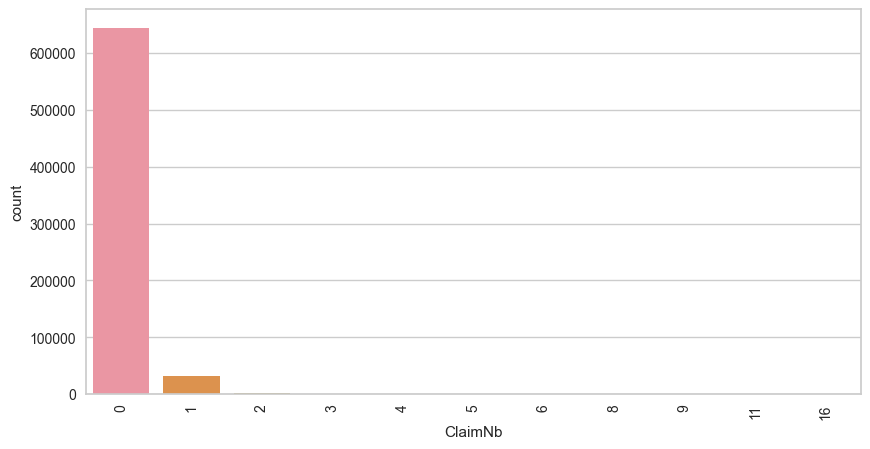

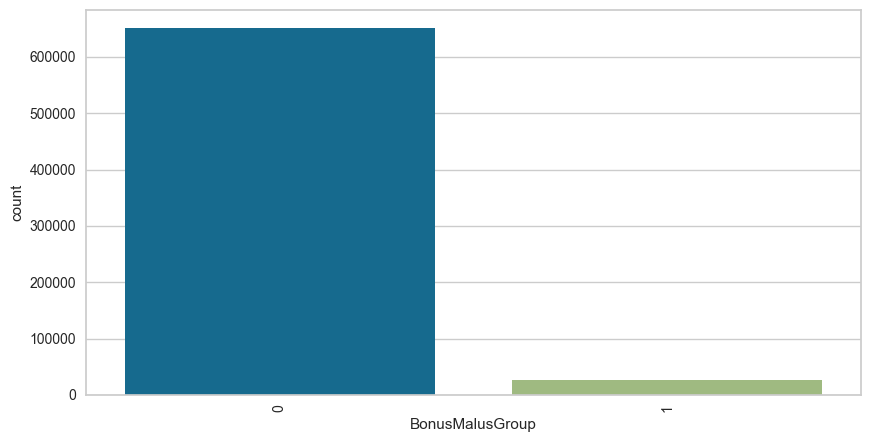

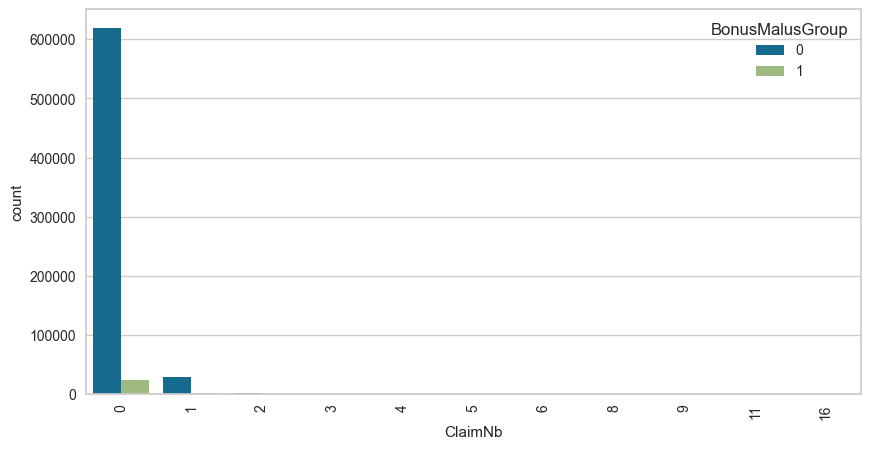

In [86]:
# Visual exploration of the cross table bar plots
def plot_cross_table_bar(df, x, y, hue=None, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    sns.countplot(x=x, hue=hue, data=df)
    plt.xticks(rotation=90)
    plt.show()
    plt.figure(figsize=figsize)
    sns.countplot(x=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    plt.show()
    plt.figure(figsize=figsize)
    sns.countplot(x=x, hue=y, data=df)
    plt.xticks(rotation=90)
    plt.show()

# BonusMalus: <100 are  bonus, >100  are malus
# create a new column BonusMalusGroup to group the BonusMalus values bonus=0, malus=1
ds['BonusMalusGroup'] = np.where(ds['BonusMalus'] < 100, 0, 1)
ds['BonusMalusGroup'].value_counts()

# Visual exploration of the cross table bar plots
plot_cross_table_bar(ds, 'ClaimNb', 'BonusMalusGroup')



In [87]:
# DrivAge max and min values
print(ds['DrivAge'].max())
print(ds['DrivAge'].min())

100
18


In [88]:
ds['Exposure'].describe()

'''
count    678013.000000
mean          0.528750
std           0.364442
min           0.002732
25%           0.180000
50%           0.490000
75%           0.990000
max           2.010000
'''
##create new colum to Exposure  bins interval based on distribution/quartiles
ds['ExposureGroup'] = pd.cut(ds['Exposure'], bins=[0, 0.18, 0.49, 0.99, 2.01], labels=['0-0.18', '0.18-0.49', '0.49-0.99', '0.99-2.01'])
ds['ExposureGroup'].value_counts()


0-0.18       174616
0.99-2.01    169349
0.49-0.99    167047
0.18-0.49    167001
Name: ExposureGroup, dtype: int64

In [89]:
# Visual exploration of the cross table bar plots
ds['DrivAge'].describe()
'''
count    678013.000000
mean         45.499122
std          14.137444
min          18.000000
25%          34.000000
50%          44.000000
75%          55.000000
max         100.000000
'''

##create new colum to group DrivAge bins interval based on distribution/quartiles, min 18, 25% = 34, 50% = 44 , 75% = 55, max 100
ds['DrivAgeGroup'] = pd.cut(ds['DrivAge'], bins=[18, 34, 44, 55, 100], labels=['18-34', '35-44', '45-55', '56-100'])
ds['DrivAgeGroup'].value_counts()


45-55     178606
35-44     170578
18-34     170397
56-100    157684
Name: DrivAgeGroup, dtype: int64

In [90]:
ds['VehAge'].describe()
'''
count    678013.000000
mean          7.044265
std           5.666232
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max         100.000000
'''
##create new colum to VehAgeGroup  bins interval based on distribution/quartiles

ds['VehAgeGroup'] = pd.cut(ds['VehAge'], bins=[-1, 2, 6, 11, 100], labels=['0-2', '3-6', '7-11', '12-100'])
ds['VehAgeGroup'].value_counts()

0-2       188147
3-6       168207
7-11      165307
12-100    156352
Name: VehAgeGroup, dtype: int64

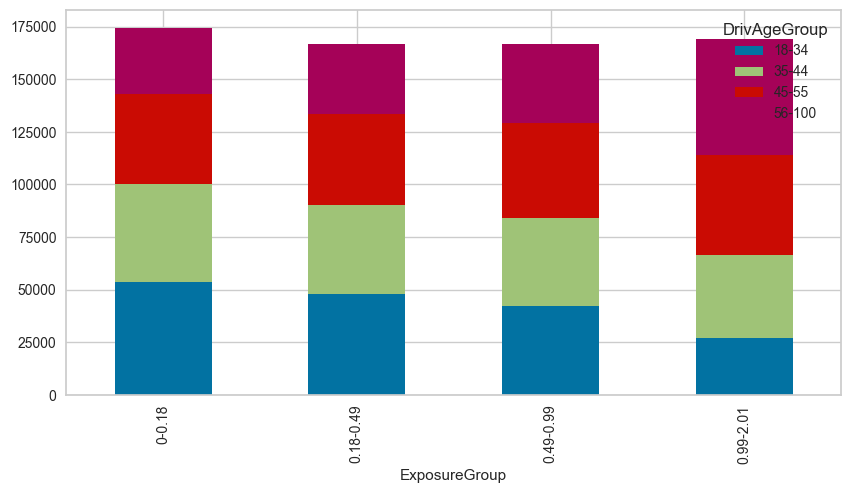

In [91]:
table1=pd.crosstab(index=ds['ExposureGroup'],columns=ds['DrivAgeGroup'])
table1.plot(kind="bar",figsize=(10,5),stacked=True)
plt.show()


VehPower
6     148976
7     145401
5     124821
4     115349
8      46956
10     31354
9      30085
11     18352
12      8214
13      3229
15      2926
14      2350
Name: VehPower, dtype: int64

Region
R24    160601
R82     84752
R93     79315
R11     69791
R53     42122
R52     38751
R91     35805
R72     31329
R31     27285
R54     19046
R73     17141
R41     12990
R25     10893
R26     10492
R23      8784
R22      7994
R83      5287
R74      4567
R94      4516
R21      3026
R42      2200
R43      1326
Name: Region, dtype: int64

Area
C    191880
D    151596
E    137167
A    103957
B     75459
F     17954
Name: Area, dtype: int64

VehBrand
B12    166024
B1     162736
B2     159861
B3      53395
B5      34753
B6      28548
B4      25179
B10     17707
B11     13585
B13     12178
B14      4047
Name: VehBrand, dtype: int64

VehGas
Regular    345877
Diesel     332136
Name: VehGas, dtype: int64

BonusMalusGroup
0    650689
1     27324
Name: BonusMalusGroup, dtype: int64

ExposureGroup
0-0.

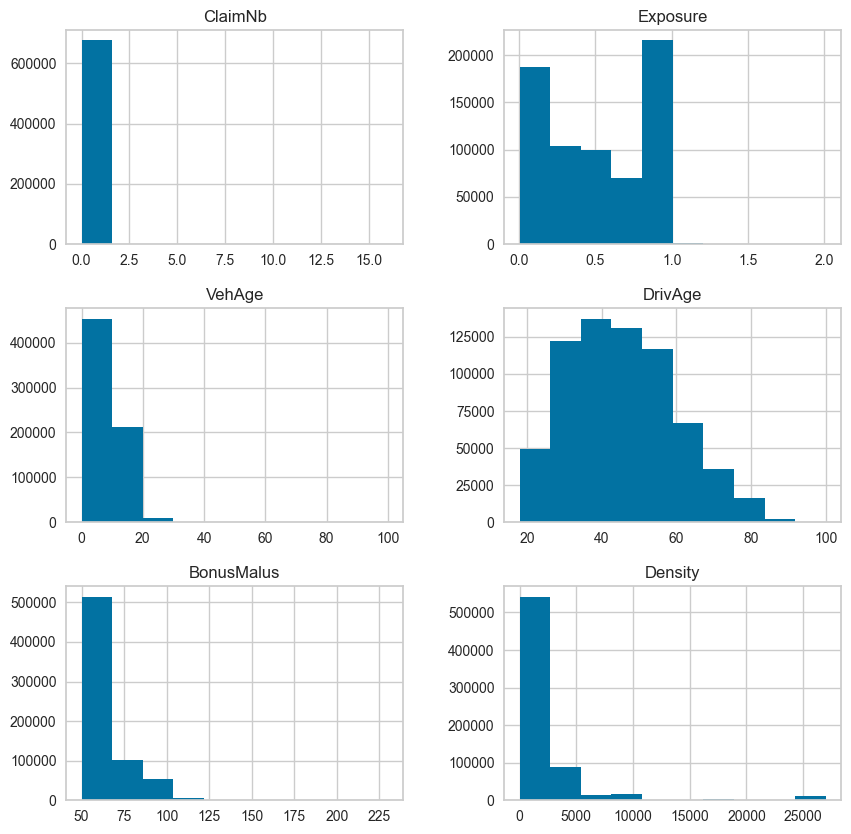

In [92]:
# Do histograms select just  numeric variables
ds = to_categorical(ds, ['Area', 'VehPower', 'VehBrand', 'VehGas', 'Region', 'BonusMalusGroup', 'DrivAgeGroup','ExposureGroup', 'VehAgeGroup'])
ds.describe(include='all').T
ds.dtypes

# Ckeck the top counts of all categorical variables
for col in ds.select_dtypes(include=['category']).columns:
    print(col)
    print(ds[col].value_counts())
    print('')

numerical=ds.select_dtypes(include=[np.number]).columns.tolist()

ds[numerical].hist(figsize=(10,10))
plt.show()


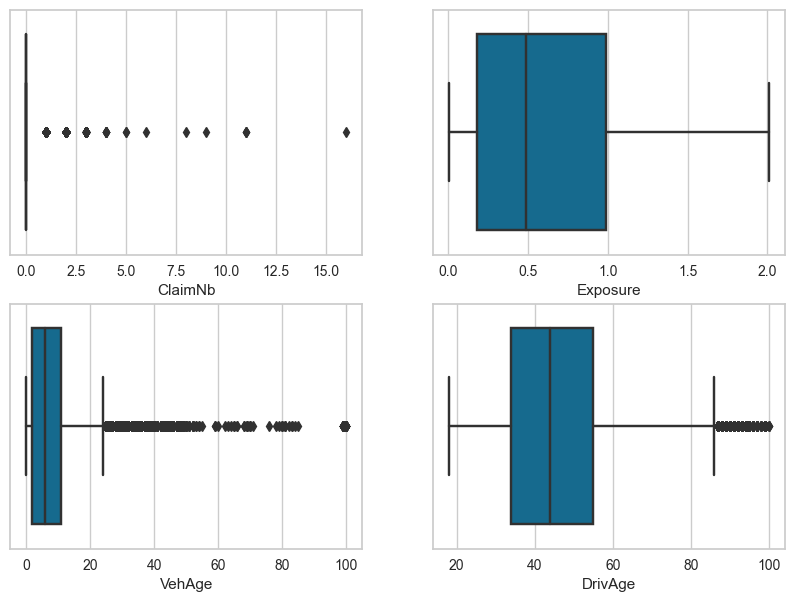

In [93]:
# Do one boxplots for each numeric variables to check for outliers
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
for var, subplot in zip(ds[numerical], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)


C:\Users\João Carlos Fidalgo\AppData\Local\Temp\ipykernel_19860\2302939270.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ds[['ClaimNb', 'Exposure', 'VehAge', 'DrivAgeGroup', 'BonusMalusGroup', 'Density']].corr()


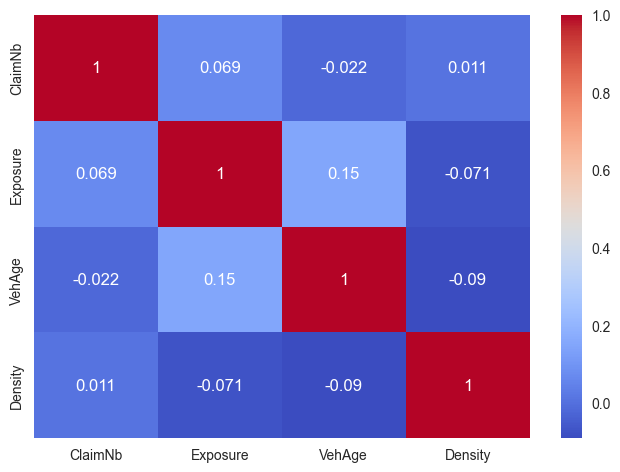

In [94]:
#Does the boxplots show any interesting patterns?
corr = ds[['ClaimNb', 'Exposure', 'VehAge', 'DrivAgeGroup', 'BonusMalusGroup', 'Density']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()




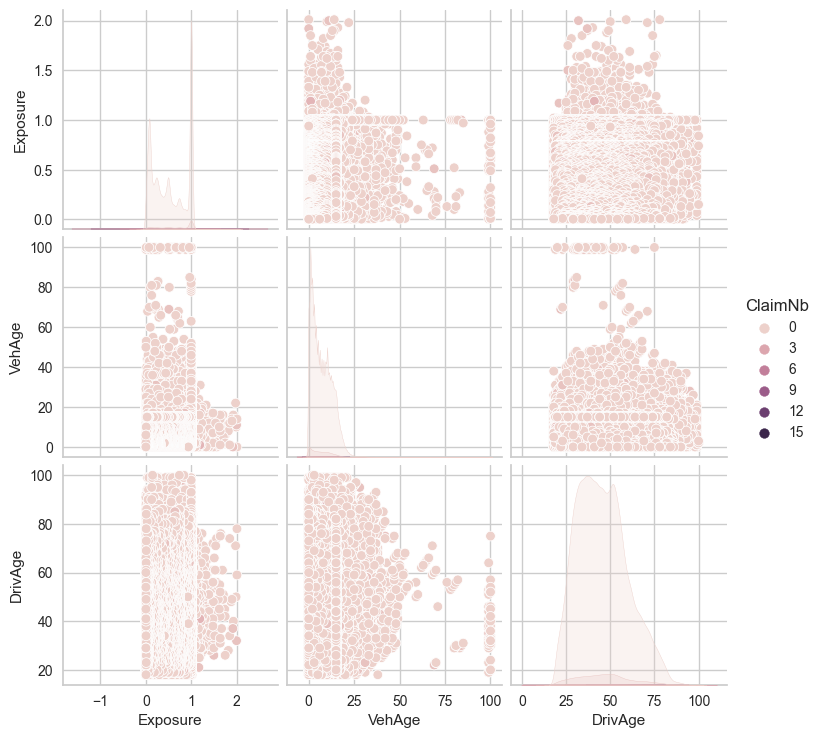

In [147]:
#are the correlations between the variables significant 'VehGas'
sns.pairplot(ds[['ClaimNb', 'Exposure', 'VehAge', 'DrivAge', 'VehGas']], hue='ClaimNb')
plt.show()


3-Data Preparation

In [96]:
# Data Preparation
# Create a modeling dataset from the original dataset

ds_modeling = ds.copy(deep=True) # deep=True to create a copy of the data and the indices
ds_modeling.head(20)

#find the columns with outliers
ds_modeling[numerical].describe()


,ClaimNb,Exposure,VehAge,DrivAge,BonusMalus,Density
count,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,0.053247,0.528750,7.044265,45.499122,59.761502,1792.422405
std,0.240117,0.364442,5.666232,14.137444,15.636658,3958.646564
min,0.000000,0.002732,0.000000,18.000000,50.000000,1.000000
25%,0.000000,0.180000,2.000000,34.000000,50.000000,92.000000
50%,0.000000,0.490000,6.000000,44.000000,50.000000,393.000000
75%,0.000000,0.990000,11.000000,55.000000,64.000000,1658.000000
max,16.000000,2.010000,100.000000,100.000000,230.000000,27000.000000


In [97]:
# Let's assume ClaimNb, VehAge, DrivAge and Density values have outliers values, so we will remove them
#remove the outliers with the IQR method
# |----|   |   |------|
# IQR = Q3 - Q1
# Q1 = 25th percentile
# Q3 = 75th percentile
# IQR = Q3 - Q1
# Lower bound = Q1 - 1.5 * IQR
# Upper bound = Q3 + 1.5 * IQR
'''
# Calculate the first and third quartile
first_quartile = ds_modeling['ClaimNb'].quantile(0.25)
third_quartile = ds_modeling['ClaimNb'].quantile(0.75)

# Interquartile range
iqr = third_quartile - first_quartile

# Remove the outliers
ds_modeling = ds_modeling[(ds_modeling['ClaimNb'] > first_quartile - 1.5 * iqr) & (ds_modeling['ClaimNb'] < third_quartile + 1.5 * iqr)]
ds_modeling['ClaimNb'].describe()
'''
ds_modeling = ds_modeling[(ds_modeling['ClaimNb'] < 4) & (ds_modeling['VehAge'] < 80) & (ds_modeling['DrivAge'] < 85) & (ds_modeling['Density'] < 25000)]
ds_modeling.head(10)
ds_modeling.shape


(665493, 16)

In [98]:
# compare the original dataset with the modeling dataset
#original dataset
ds[numerical].describe()


,ClaimNb,Exposure,VehAge,DrivAge,BonusMalus,Density
count,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,0.053247,0.528750,7.044265,45.499122,59.761502,1792.422405
std,0.240117,0.364442,5.666232,14.137444,15.636658,3958.646564
min,0.000000,0.002732,0.000000,18.000000,50.000000,1.000000
25%,0.000000,0.180000,2.000000,34.000000,50.000000,92.000000
50%,0.000000,0.490000,6.000000,44.000000,50.000000,393.000000
75%,0.000000,0.990000,11.000000,55.000000,64.000000,1658.000000
max,16.000000,2.010000,100.000000,100.000000,230.000000,27000.000000


In [99]:
#modeling dataset
ds_modeling[numerical].describe()

,ClaimNb,Exposure,VehAge,DrivAge,BonusMalus,Density
count,665493.000000,665493.000000,665493.000000,665493.000000,665493.000000,665493.000000
mean,0.052788,0.528992,7.066997,45.341448,59.728789,1396.309522
std,0.236434,0.364615,5.598679,13.963567,15.604593,2399.404004
min,0.000000,0.002732,0.000000,18.000000,50.000000,1.000000
25%,0.000000,0.170000,2.000000,34.000000,50.000000,91.000000
50%,0.000000,0.490000,6.000000,44.000000,50.000000,376.000000
75%,0.000000,1.000000,11.000000,55.000000,64.000000,1516.000000
max,3.000000,2.010000,79.000000,84.000000,230.000000,23396.000000


In [100]:
#original dataset
ds.shape

(678013, 16)

In [101]:
#modeling dataset
ds_modeling.shape

(665493, 16)

In [103]:
ds_modeling.head()

#Observations, we add and remove columns to the modeling dataset to make it more suitable for modeling.
#So following we can see changes we made to the modeling dataset:
    #Groupby DrivAgeGroup with mean ClaimNb of other columns to see the distribution of the data
        #ds_modeling['mean_Exposure_ClaimNb']=ds_modeling.groupby('Exposure')['ClaimNb'].agg(mean_Exposure_ClaimNb='mean')
    #drop colmnuns mean_DrivAgeGroup_claimNB, mean_DrivAgeGroup_Exposure
        #ds_modeling.drop(['mean_Exposure_ClaimNb', 'mean_DrivAgeGroup_Exposure', 'mean_DrivAgeGroup_claimNB'], axis=1, inplace=True)


,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Region,Area,VehBrand,VehGas,BonusMalusGroup,ExposureGroup,DrivAgeGroup,VehAgeGroup
0,1,1,0.10,5,0,55,50,1217,R82,D,B12,Regular,0,0-0.18,45-55,0-2
1,3,1,0.77,5,0,55,50,1217,R82,D,B12,Regular,0,0.49-0.99,45-55,0-2
2,5,1,0.75,6,2,52,50,54,R22,B,B12,Diesel,0,0.49-0.99,45-55,0-2
3,10,1,0.09,7,0,46,50,76,R72,B,B12,Diesel,0,0-0.18,45-55,0-2
4,11,1,0.84,7,0,46,50,76,R72,B,B12,Diesel,0,0.49-0.99,45-55,0-2


In [104]:
# Encode categorical values into dummy variables, onehotencoder is  a class that has a method called 
# fit_transform that will transform the data into dummy variables, ce is a library that has the onehotencoder class
#use_cat_names = True to use the categorical variable names as prefix 
onehotencoder = ce.OneHotEncoder(cols=['Area', 'VehPower', 'VehBrand', 'VehGas', 'Region', 'BonusMalusGroup', 'DrivAgeGroup', 'VehAgeGroup', 'ExposureGroup'],  use_cat_names=True)
ds_modeling_ce_one_hot = onehotencoder.fit_transform(ds_modeling)
ds_modeling_ce_one_hot.head(10)


c:\Users\João Carlos Fidalgo\OneDrive - Banco de Cabo Verde\Pós-Graduação_ Data_science\datascience-env\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\João Carlos Fidalgo\OneDrive - Banco de Cabo Verde\Pós-Graduação_ Data_science\datascience-env\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\João Carlos Fidalgo\OneDrive - Banco de Cabo Verde\Pós-Graduação_ Data_science\datascience-env\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\João Carlos Fidalgo\OneDrive - Banco de Cabo Verde\Pós-Graduação_ Data_science\datasc

,IDpol,ClaimNb,Exposure,VehPower_5.0,VehPower_6.0,VehPower_7.0,VehPower_4.0,VehPower_15.0,VehPower_9.0,VehPower_8.0,...,ExposureGroup_0.99-2.01,DrivAgeGroup_18-34,DrivAgeGroup_35-44,DrivAgeGroup_45-55,DrivAgeGroup_56-100,DrivAgeGroup_nan,VehAgeGroup_0-2,VehAgeGroup_3-6,VehAgeGroup_7-11,VehAgeGroup_12-100
0,1,1,0.10,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,3,1,0.77,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,5,1,0.75,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,10,1,0.09,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,11,1,0.84,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5,13,1,0.52,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6,15,1,0.45,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7,17,1,0.27,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8,18,1,0.71,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
9,21,1,0.15,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


4.Modeling

In [148]:
## develop a model to forecast how many claims will each policy holder from a car insurer in France have in the following year.
# Splitting the dataset into the Training set and Test set

X = ds_modeling_ce_one_hot.drop(['ClaimNb', 'IDpol'], axis=1)

y = ds_modeling_ce_one_hot['ClaimNb'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 123) # 75% training and 25% test


X

,Exposure,VehPower_5.0,VehPower_6.0,VehPower_7.0,VehPower_4.0,VehPower_15.0,VehPower_9.0,VehPower_8.0,VehPower_10.0,VehPower_12.0,...,ExposureGroup_0.99-2.01,DrivAgeGroup_18-34,DrivAgeGroup_35-44,DrivAgeGroup_45-55,DrivAgeGroup_56-100,DrivAgeGroup_nan,VehAgeGroup_0-2,VehAgeGroup_3-6,VehAgeGroup_7-11,VehAgeGroup_12-100
0,0.10000,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0.77000,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0.75000,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.09000,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0.84000,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678008,0.00274,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
678009,0.00274,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
678010,0.00274,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
678011,0.00274,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


4.1-Tree Regressor

In [149]:
tree_regressor=tree.DecisionTreeRegressor(random_state=123, max_depth=4, min_samples_leaf=5)

In [150]:
tree_regressor.fit(X, y, sample_weight=None, check_input=True)
tree_regressor

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=123)

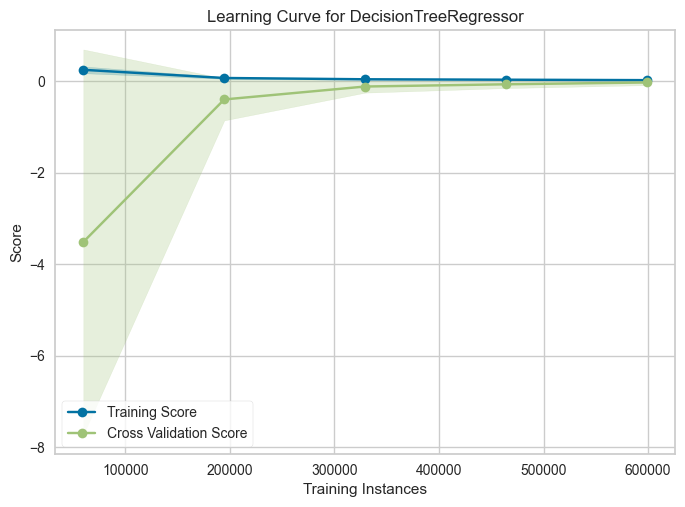

<AxesSubplot: title={'center': 'Learning Curve for DecisionTreeRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [151]:
# Instantiate the learning curve visualizer,
# Plot the learning curve,

cv = 10
sizes = np.linspace(0.1, 1.0, 5)
visualizer = LearningCurve(estimator=tree_regressor, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=4, random_state=123)
visualizer.fit(X, y)
visualizer.show()    

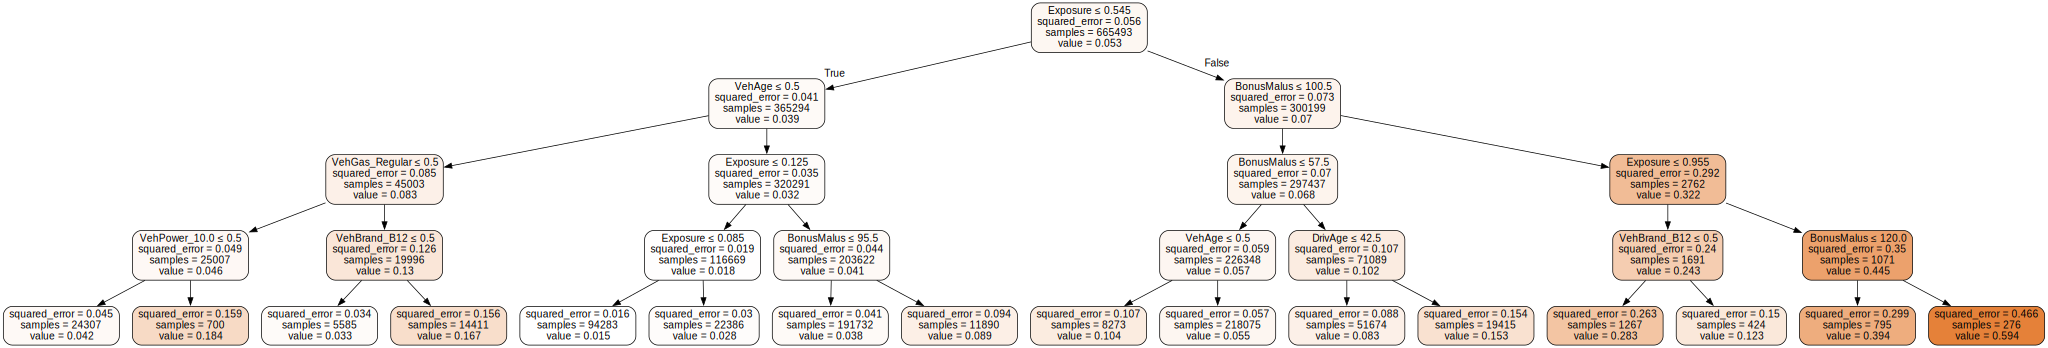

In [152]:
# Plot the tree
# Install Graphviz using \"pip install graphviz\" or \"conda install python-graphviz\
import graphviz
dot_data = tree.export_graphviz(tree_regressor, out_file=None, 
                      feature_names=list(X_train.columns),  
                      class_names='Returns',  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [153]:
##forecast the data to know how many claims will each policy holder from a car insurer in  have in the following year

# Predicting the Test set results
y_pred = tree_regressor.predict(X_test)

# print the first 10 predicted responses
print('first 10 predicted: ',y_pred[0:10])

# print the first 10 actual responses
print('first 10 actual: ',y_test[0:10])




first 10 predicted:  [0.05493064 0.05493064 0.05493064 0.01508225 0.01508225 0.01508225
 0.03792794 0.08333011 0.03792794 0.03792794]
first 10 actual:  266690    0
167411    0
614874    0
217596    0
24580     0
128735    0
391119    0
613431    0
302737    0
470043    0
Name: ClaimNb, dtype: int64


C:\Users\João Carlos Fidalgo\AppData\Local\Temp\ipykernel_19860\3851596966.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print('first 10 actual: ',y_test[0:10])


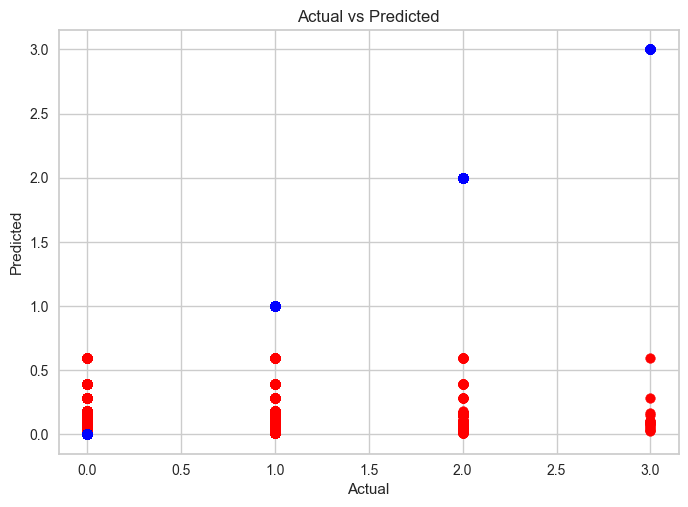

In [154]:
#plot the actual and predicted values to see the difference
# y_test color is blue
# y_pred color is red
plt.scatter(y_test, y_pred, color = 'red')
plt.scatter(y_test, y_test, color = 'blue')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [157]:
# Evaluate the model using 10-fold cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_regressor, X, y, scoring='r2', cv=10)
print('Cross-validated scores:', scores)


Cross-validated scores: [-0.13723724  0.00447476  0.01678918 -0.00031505 -0.00078295 -0.02257891
  0.03428662 -0.04134246  0.02025316 -0.13382487]


In [159]:
# Make cross validated predictions
# predict y for X_train and X_test,
y_pred_train = tree_regressor.predict(X_train)
print('y_pred_train: ',y_pred_train)
y_pred_test = tree_regressor.predict(X_test)
print('y_pred_test: ',y_pred_test)

y_pred_train:  [0.03792794 0.05493064 0.03792794 ... 0.03792794 0.01508225 0.05493064]
y_pred_test:  [0.05493064 0.05493064 0.05493064 ... 0.01508225 0.01508225 0.03792794]


In [160]:
# Explore feature importance (Gini importance - normalized),
formattedList = [float(format(member,'.6f')) for member in tree_regressor.feature_importances_]

formattedList2 = [abs(float(format(member,'.6f'))) for member in tree_regressor.feature_importances_]

data_tuples = list(zip(X.columns,formattedList,formattedList2))

coeff_df = pd.DataFrame(data=data_tuples, columns=['Feature','Coefficient','AbsCoefficient'])
coeff_df.reset_index(drop=True, inplace=True)

coeff_df.sort_values(by=['AbsCoefficient'], inplace=True, ascending=False)
coeff_df

,Feature,Coefficient,AbsCoefficient
15,BonusMalus,0.354193,0.354193
0,Exposure,0.251713,0.251713
13,VehAge,0.130870,0.130870
45,VehBrand_B12,0.088076,0.088076
56,VehGas_Regular,0.085352,0.085352
...,...,...,...
33,Region_R25,0.000000,0.000000
34,Region_R21,0.000000,0.000000
35,Region_R41,0.000000,0.000000
1,VehPower_5.0,0.000000,0.000000


In [162]:
from sklearn import metrics

# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['MAE','RMSE', 'R^2','MAPE (%)','MAX Error']
  train_results = [metricsObj.mean_absolute_error(yTrain, yPredTrain),
                np.sqrt(metricsObj.mean_squared_error(yTrain, yPredTrain)),
                metricsObj.r2_score(yTrain, yPredTrain),
                metricsObj.mean_absolute_percentage_error(yTrain, yPredTrain),
                metricsObj.max_error(yTrain, yPredTrain)]
  test_results = [metricsObj.mean_absolute_error(yTest, yPredTest),
                np.sqrt(metricsObj.mean_squared_error(yTest, yPredTest)),
                metricsObj.r2_score(yTest, yPredTest),
                  metricsObj.mean_absolute_percentage_error(yTest, yPredTest),
                metricsObj.max_error(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)
# Show performance results,

resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF 
#MAE extend for mean absolute error,
 #RMSE is 0.5, which is not very good. The model is not very accurate
    

,Measure,Train,Test
0,MAE,9.792934e-02,9.723760e-02
1,RMSE,2.342058e-01,2.313093e-01
2,R^2,2.465303e-02,2.518235e-02
3,MAPE (%),2.200712e+14,2.202977e+14
4,MAX Error,2.984918e+00,2.971857e+00


c:\Users\João Carlos Fidalgo\OneDrive - Banco de Cabo Verde\Pós-Graduação_ Data_science\datascience-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


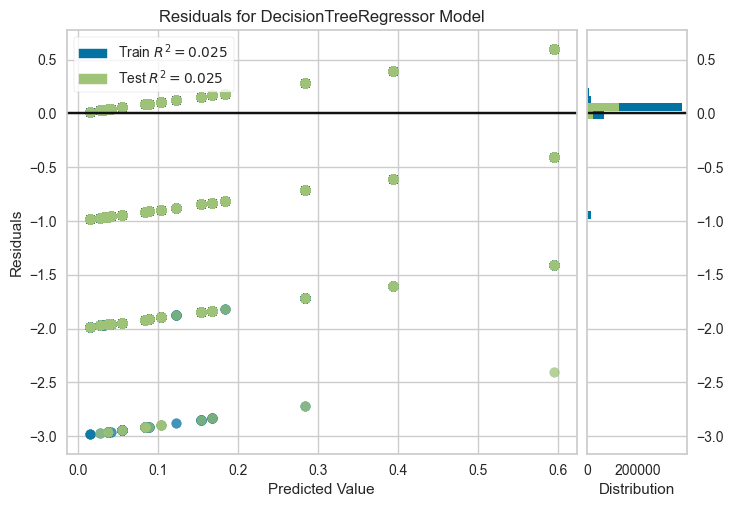

<AxesSubplot: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [163]:
from yellowbrick.regressor import ResidualsPlot

# Visualize the residuals
residuals_vis = ResidualsPlot(tree_regressor)
residuals_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
residuals_vis.score(X_test, y_test)  # Evaluate the model on the test data
residuals_vis.show()


c:\Users\João Carlos Fidalgo\OneDrive - Banco de Cabo Verde\Pós-Graduação_ Data_science\datascience-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


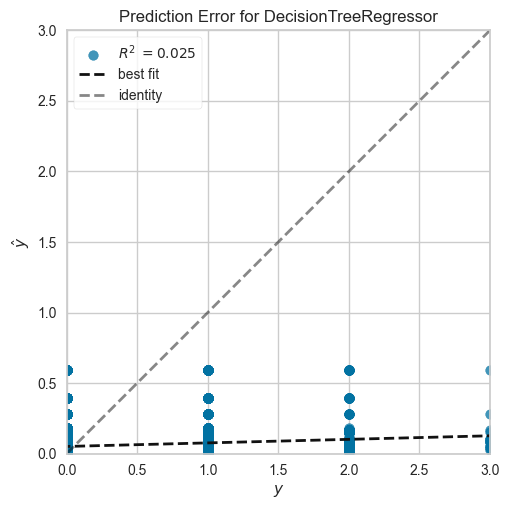

<AxesSubplot: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [164]:
from yellowbrick.regressor import PredictionError

# Visualize the prediction error
predError_vis = PredictionError(tree_regressor)
predError_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
predError_vis.score(X_test, y_test)  # Evaluate the model on the test data
predError_vis.show() 


4.2-Linear Regression

In [165]:
Linear_regressor = linear_model.LinearRegression()

In [166]:
# Apply RFECV (Recursive Feature Elimination) to select features
# see https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html
#atenção: o RFECV não funciona com o OneHotEncoder, por isso é necessário usar o LabelEncoder

vis = RFECV(Linear_regressor, cv=5, scoring='r2')
vis.fit(X_train, y_train)
vis.show()

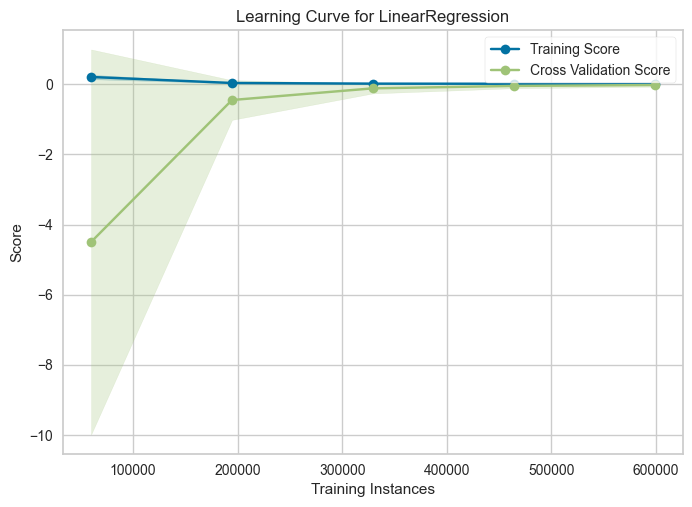

<AxesSubplot: title={'center': 'Learning Curve for LinearRegression'}, xlabel='Training Instances', ylabel='Score'>

In [122]:
sizes = np.linspace(0.1, 1.0, 5)
visualizer = LearningCurve(estimator=Linear_regressor, cv=10, scoring='r2', train_sizes=sizes, n_jobs=4, random_state=123)
visualizer.fit(X, y)
visualizer.show()    

In [123]:
Linear_regressor.fit(X_train, y_train)

LinearRegression()

In [124]:
print('Intercept: \n', Linear_regressor.intercept_)

formattedList = [float(format(member,'.6f')) for member in Linear_regressor.coef_]
formattedList2 = [abs(float(format(member,'.6f'))) for member in Linear_regressor.coef_]
data_tuples = list(zip(X.columns,formattedList,formattedList2))
coeff_df = pd.DataFrame(data=data_tuples, columns=['Feature','Coefficient','AbsCoefficient'])
coeff_df['AbsCoefficient'] = coeff_df['AbsCoefficient'].astype(float)
coeff_df.sort_values(by=['AbsCoefficient'], inplace=True, ascending=False)
coeff_df


Intercept: 
 -0.03423616738997105


,Feature,Coefficient,AbsCoefficient
0,Exposure,0.058629,0.058629
58,BonusMalusGroup_0.0,-0.014501,0.014501
59,BonusMalusGroup_1.0,0.014501,0.014501
5,VehPower_15.0,-0.012903,0.012903
27,Region_R83,-0.011580,0.011580
...,...,...,...
14,DrivAge,0.000393,0.000393
60,ExposureGroup_0-0.18,-0.000339,0.000339
65,DrivAgeGroup_35-44,-0.000332,0.000332
28,Region_R54,0.000273,0.000273


5.Evaluation


In [125]:
y_pred_train = Linear_regressor.predict(X_train)
y_pred_test = Linear_regressor.predict(X_test)


In [126]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['MAE','RMSE', 'R^2','MAPE (%)','MAX Error']
  train_results = [metricsObj.mean_absolute_error(yTrain, yPredTrain),
                np.sqrt(metricsObj.mean_squared_error(yTrain, yPredTrain)),
                metricsObj.r2_score(yTrain, yPredTrain),
                metricsObj.mean_absolute_percentage_error(yTrain, yPredTrain),
                metricsObj.max_error(yTrain, yPredTrain)]
  test_results = [metricsObj.mean_absolute_error(yTest, yPredTest),
                np.sqrt(metricsObj.mean_squared_error(yTest, yPredTest)),
                metricsObj.r2_score(yTest, yPredTest),
                  metricsObj.mean_absolute_percentage_error(yTest, yPredTest),
                metricsObj.max_error(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [127]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,MAE,9.957662e-02,9.888238e-02
1,RMSE,2.354487e-01,2.326090e-01
2,R^2,1.427359e-02,1.419675e-02
3,MAPE (%),2.251105e+14,2.253650e+14
4,MAX Error,2.992259e+00,2.965313e+00


c:\Users\João Carlos Fidalgo\OneDrive - Banco de Cabo Verde\Pós-Graduação_ Data_science\datascience-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


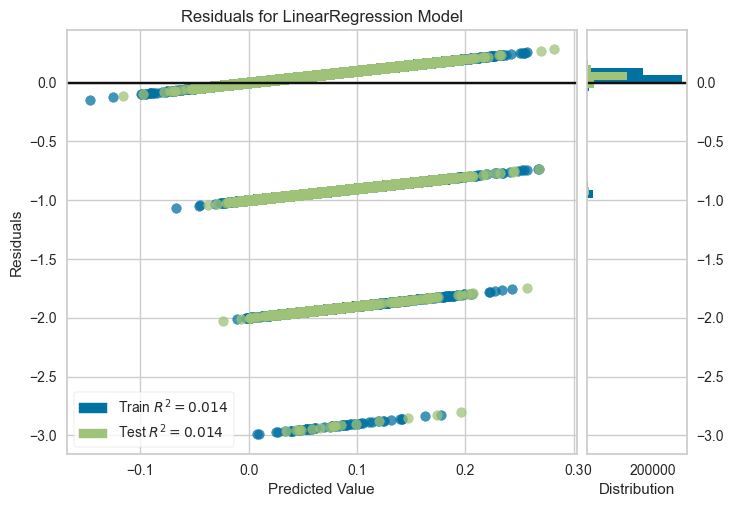

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [130]:
# Visualize the residuals
residuals_vis = ResidualsPlot(Linear_regressor)
residuals_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
residuals_vis.score(X_test, y_test)  # Evaluate the model on the test data
residuals_vis.show() 

c:\Users\João Carlos Fidalgo\OneDrive - Banco de Cabo Verde\Pós-Graduação_ Data_science\datascience-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


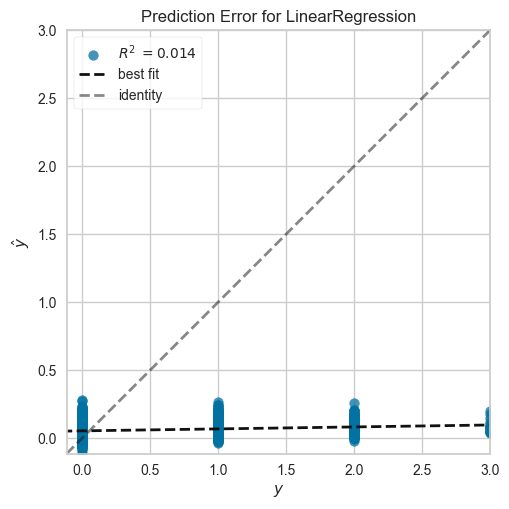

<AxesSubplot: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [131]:
# Visualize the prediction error
predError_vis = PredictionError(Linear_regressor)
predError_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
predError_vis.score(X_test, y_test)  # Evaluate the model on the test data
predError_vis.show() 


6.Deployment

In [ ]:
# Deploy the model the linear regression model and the tree regression model
import pickle

# Save the model to disk
filename_linear = 'finalized_mode_linear.sav'
pickle.dump(Linear_regressor, open(filename_linear, 'wb'))



# Save the model to disk (tree regression model)
filename_tree = 'finalized_model_tree.sav'
pickle.dump(tree_regressor, open(filename_tree, 'wb'))



In [ ]:
# Load the model from disk
loaded_model = pickle.load(open(filename , 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)